# Week 1: Introduction to TensorFlow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

TensorFlow is a library (usually used with Python) developed by Google Brain for training and running statistical machine learning models.
It is extremely flexible, making almost no assumptions about your model except that you can represent it as a graph of math operations.
As a result, it sees lots of use in developing new machine learning models, as well as efficiently training and running existing models.

Advantages of TensorFlow over other frameworks:
 - Most flexible by far -- can use basically any differentiable equation as a model
 - Most popular and heavily-developed framework by far, used by numerous companies
 - Works well with CPUs, GPUs, and TPUs (Tensor Processsing Units), and across lots of devices, including distributed training
 - Incredible debugging and visualization utilities (TensorBoard and tfdbg)
 - Graph compilation can optimize your code for you
 - Gives you lots of control over hardware (e.g. whether variables live in CPU or GPU memory)
 - Open-source!

Disadvantages:
 - Graph programming unfamiliar to many people
 - Hard to search documentation, lots of deprecated and soon-to-be-deprecated APIs (for TensorFlow 1.0, with TensorFlow 2.0 this has changed)
 - Generally more verbose and difficult to develop models (but we will also learn Keras, a library meant to make building common models in TensorFlow very simple)
 - Can be slower than other frameworks for certain models (Apache MXNET)
 - TensorFlow itself doesn't support every kind of statistical model, most notably "graphical models" associated with Bayesian statistics (although, see [bayesflow](https://www.tensorflow.org/api_docs/python/tf/contrib/bayesflow)) 

# Why care?

Because it lets you do all of the awesome things machine learning can do:
 - [Translate between any two human languages](https://code.fb.com/ai-research/laser-multilingual-sentence-embeddings/)
 - [Play games with superhuman skill](https://deepmind.com/blog/alphazero-shedding-new-light-grand-games-chess-shogi-and-go/)
 - [Make a picture look like it was painted by Picasso](http://genekogan.com/works/style-transfer/)
 - [Generate realistic human faces](https://blog.openai.com/glow/) 
 - [See through walls with WiFi](https://news.mit.edu/2018/artificial-intelligence-senses-people-through-walls-0612)
 - [Have your phone make calls for you](https://ai.googleblog.com/2018/05/duplex-ai-system-for-natural-conversation.html)
 - [Find every tree in the world (shameless self-plug)](https://medium.com/descarteslabs-team/descartes-labs-urban-trees-tree-canopy-mapping-3b6c85c5c9cc)
 * ...
 
 For example, the people in these pictures never existed but were synthesized by a neural network:
![Faces generated by neural network](https://research.nvidia.com/sites/default/files/publications/representative_image_512x256.png) 

 (Image credit: [Nvidia Research, Progressive Growing of GANs for Improved Quality, Stability, and Variation](https://research.nvidia.com/publication/2017-10_Progressive-Growing-of))

# Overview of TensorFlow API levels
![tensorflow api levels](https://3.bp.blogspot.com/-l2UT45WGdyw/Wbe7au1nfwI/AAAAAAAAD1I/GeQcQUUWezIiaFFRCiMILlX2EYdG49C0wCLcBGAs/s1600/image6.png)

We'll be focusing on three of these:
 - Python frontend (or "operations-level TensorFlow") lets you build a computational graph by hand for maximum power and flexibility.
 - Keras to build neural networks quickly and easily.
 - Datasets API to load and preprocess data efficiently.
 
This covers the two most common tasks: using Keras to build a simple neural network using common kinds of layers (like fully-connected, convolutional, and recurrent layers), and using operations-level TensorFlow to develop a novel model.
 
(Image credit: [Google Developers Blog, Introduction to TensorFlow Datasets and Estimators](https://developers.googleblog.com/2017/09/introducing-tensorflow-datasets.html))

# Tensors and tensor values
To do machine learning, you _really_ need to understand tensors and the terminology surrounding them.
You can (for machine learning, at least) think of tensors as multidimensional arrays.

![tensors](./images/tensors_diagram.jpg)

In TensorFlow 2, `tf.Tensor` objects act as wrapper classes for _tensor values_, which are numpy arrays.
I'll try to stick to the notation **"tensor"** to mean `tf.Tensor` objects and **"tensor value"** to mean a multidimensional numpy array.
The terminology around tensors and tensor values is the same.

A tensor consists of a number of **scalars** organized in some "rectangular" way.
Scalars have a [**data type**](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType), usually a real floating-point number (`tf.float32`), integer (`tf.int32`), or boolean (`tf.bool`).
To access a particular scalar in a tensor, provide an index in each of its **axes** (also called **dimensions**).
The total number of axes a tensor has is its **rank**, and each axis has a fixed **size** which determines how many sub-tensors (of rank one less than the parent) you can get by indexing into just that axis.
The total number of scalars a tensor can hold is the product of the sizes of its axes (unless it's rank-zero, then it holds a single value).

All of the "size" properties of a tensor are encapsulated by its **shape**, which fully specifies how many axes it has, what order they come in, and what their sizes are.
A tensor's shape is given by a tuple.
For example:
 - a tensor with shape (3) is a vector (rank-1 tensor) with 3 elements
 - a tensor with shape (3, 4) is a matrix (rank-2 tensor) with 3 rows and 4 columns
 - a tensor with shape () is a scalar (rank-0 tensor; you need no indices to uniquely identify its only element)
 - a tensor with shape (2, 2, 2) (rank-3 tensor) is a 2x2x2 "data cube"
 - a tensor with shape (3, 1) is a matrix (rank-2 tensor) with 3 rows and 1 column; subtle difference from having shape (3)
 
When you provide an index for $n$ axes of a rank-$r$ tensor, you get back a tensor with rank $r - n$, and a shape the same as the original but with the indexed axes removed.
Numpy and TensorFlow have roughly the same notation for indexing into tensors to obtain sub-tensors.
Similarly, some operations called **reductions** operate across one or more axes of a tensor, collapsing those axes into a scalar summarizing their elements.
For instance, `tf.reduce_sum` applied to every axis of a tensor outputs a scalar equal to the sum of its scalars.
`tf.reduce_mean` applied to axis 0 of a rank-2 tensor returns a vector that, for each column, contains a scalar of the mean of all of the rows in that column. 

Matrix transposition (which swaps the rows and columns of a matrix) has a natural extension to tensors: it just reorders their axes.
You can "reshape" a tensor into a _compatible_ shape, which is to say one where the total number of scalars remains the same.

I highly recommend understanding numpy indexing, including some of the advanced stuff you can do (like broadcasting, masking, and `np.where`) since a lot of this transfers to TensorFlow.

For a good guide to numpy indexing, read https://realpython.com/numpy-array-programming/.
For more on tensors, you can read https://www.tensorflow.org/guide/tensors.

In [2]:
# Examples of creating tensor values in numpy
print('Tensor values:')
print(np.array(3), '\n')           # A rank-zero tensor with shape ()
print(np.array([1, 2, 3]), '\n')   # A rank-one tensor with shape (3)
print(np.array([[1, 2],
                 [3, 4]]), '\n')   # A rank-two tensor with shape (2, 2)
print(np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]]), '\n')  # A rank-three tensor with shape (2, 2, 2)
print(np.array([[1, 2, 3]]), '\n') # A rank-two tensor with shape (1, 3)

Tensor values:
3 

[1 2 3] 

[[1 2]
 [3 4]] 

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

[[1 2 3]] 



In [3]:
# Example of printing tensor shapes
print('Tensor shapes:')
print(np.array([[1, 2], [3, 4]]).shape)
print(np.array(3).shape, '\n')

Tensor shapes:
(2, 2)
() 



In [4]:
# Example of printing tensor rank
print('Tensor rank:', 
      np.array([[1, 2], [3, 4]]).ndim,
      '\n')

Tensor rank: 2 



In [5]:
# Examples of indexing
print('Tensor indexing:')
a = np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]])

print('a:', a, '\n')

print('a[0, 0, 0] =', a[0, 0, 0])  # Selecting a particular scalar
print('a[0, 0, 1] =', a[0, 0, 1])
print('a[0, 1, 0] =', a[0, 1, 0])
print('a[1, 0, 0] =', a[1, 0, 0], '\n')

print('a[0, 0, :] =', a[0, 0, :])   # Take the first value on axes 0 and 1, 
                                    # leaving axis 2 alone
print('a[:, 0, :] =\n', a[:, 0, :]) # Take the first value on axis 2, 
                                    # leaving axes 0 and 2 alone

Tensor indexing:
a: [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

a[0, 0, 0] = 1
a[0, 0, 1] = 2
a[0, 1, 0] = 3
a[1, 0, 0] = 5 

a[0, 0, :] = [1 2]
a[:, 0, :] =
 [[1 2]
 [5 6]]


# Differentiable programming
Differentiable programming is a paradigm in which a program is represented as a **dataflow graph**: _mathematical computations organized as a directed graph_:
![a computational graph](https://colah.github.io/posts/2015-08-Backprop/img/tree-def.png)

(Image credit: [Chris Olah's blog, Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/))

Nodes in the graph are operations, and edges are tensors, which flow between operations (hence the name).
When you want to evaluate an operation (say, to get its output tensor), all of the operations that produce tensors it depends on (found by stepping back one layer in the graph) are evaluated, and so on recursively.
In this way, you can define a bunch of interconnected computations as a single graph, and when you want to compute a value, TensorFlow will run _only the computations it needs to to compute your value_.
During a single evaluation, tensors have fixed values, so TensorFlow will cache that value in order to prevent computing the same thing multiple times.
For instance, when evaluating "e" in the above graph, the value of "b" is computed only once despite being used twice.

It's very useful to keep the graph formalism in mind when writing TensorFlow code, and we'll return to the core ideas of differentiable programming again and again in this course.
Because you completely define the graph before running it, TensorFlow can also [optimize the graph with the XLA compiler](https://www.tensorflow.org/xla/), doing things like fusing operations and doing clever memory-saving hacks.

The key feature that separates differentiable programming from ordinary graph programming is that in differentiable programming, _you only use differentiable operations_.
What this means is that you can use the chain rule (see the next lecture, on the Backpropagation algorithm) to compute _the gradient of any value in the graph with respect to any other value in the graph_.
This is incredibly powerful!

Critically, you can use _gradient-based optimization methods_ to maximize or minimize values in the graph by changing variable tensors earlier in the graph.
This is how we train machine learning models using TensorFlow.
The most common family of such optimization algorithms is... 

# Gradient descent
Gradient descent is a simple and powerful algorithm for minimizing differentiable functions.
I'll describe it only briefly here because there are [plenty](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent) [of](https://work.caltech.edu/library/101.html) [good](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da) [explanations](https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0) [online](https://www.youtube.com/watch?v=jc2IthslyzM).

For a differentiable function $f(\vec{x})$, the gradient $\nabla_\vec{x} f$ gives the direction of steepest increase of $f$ -- the direction to move the parameters $\vec{x}$ that increases $f$ the most, in a small region around the value of $\vec{x}$. 
If we want to minimize $f$, we can therefore keep track of a "current value of $\vec{x}$" and repeatedly take small steps in the opposite direction of the gradient.

The size of step is the **learning rate**, denoted $\alpha$.
It should be small, or else we'll overshoot the area where we can assume the gradient really gives the direction of steepest increase (where the linear term in the Taylor series of the function no longer dominates).
For steep gradients, we take bigger steps because we have a stronger signal of where the parameters $\vec{x}$ should go.
For $\alpha$ too small, we converge too slowly to a minimum (by taking very many small steps).
For $\alpha$ too large, we may not be able to minimize the function at all.

![gradient descent visualization](./images/gradient_descent.jpg)

In machine learning, we define a value that quantifies how badly our model fits the data (the "loss" or "training error"), then use gradient descent to change the parameters of our model (made possible by differentiable programming) to minimize that value.

Below is some example code that computes the gradients and applies the updates by hand to minimize $f(x) = x^2$.
TensorFlow will do this for you (and one of the problems on the first lab is to minimize a simple function with TensorFlow).

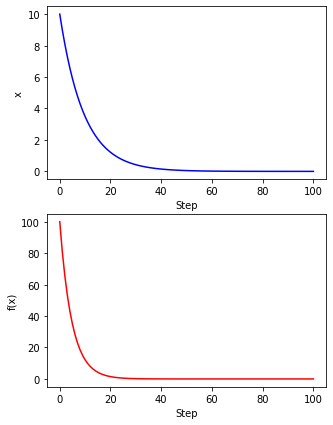

Final value of x: 0.00026561398887587435
Final value of f(x): 7.05507910865531e-08


In [6]:
# An example of minimizing the function f(x) = x^2 with gradient descent
def f(x): return x ** 2
def grad_f(x): return 2 * x # Gradient of f(x), computed by hand

x = 10
learning_rate = 0.05
x_values = [x]
y_values = [f(x)]

for step in range(100):
    x = x - learning_rate * grad_f(x)
    x_values.append(x)
    y_values.append(f(x))
    
plt.figure(figsize=(5, 7))
plt.subplot(2, 1, 1)
plt.plot(range(101), x_values, 'b-')
plt.xlabel('Step')
plt.ylabel('x')

plt.subplot(2, 1, 2)
plt.plot(range(101), y_values, 'r-')
plt.xlabel('Step')
plt.ylabel('f(x)')
plt.show()

print('Final value of x:', x)
print('Final value of f(x):', f(x))

### Tuning the learning rate
There's no single learning rate that's guaranteed to work for every problem.
When it's too high, the notion that the gradient represents the direction of steepest increase of the function breaks down -- the gradient is just the linear term in the function's Taylor series, and if you take a big step then the nonlinear terms dominate and you can wind up moving in the wrong direction, oscillating, or overshooting the minimum.
When it's too low, the steps taken are too small and optimization will be very slow.

So, when optimizing a differentiable program, you'll need to tune the learning rate.
A good approach for this is:
 1. Start out with a learning rate like $10^{-3}$
 2. If the function to be minimized is not decreasing over time (looking at plots, print statements, etc), decrease the learning rate. If it is, try increasing it. Use exponential changes here (i.e. multiply or divide by 10).
 3. Repeat until you find the largest learning rate that the problem still converges for, and hone in by making smaller changes if needed

### Aside on local minima 
Gradient descent is only guaranteed to converge to the global minimum of a _convex_ function.
This seems like a problem, since most loss functions we want to minimize are not convex.
However, local minima are very rare in high-dimensional space: for a function to be at a local minimum in $n$-dimensional space, it needs to curve upwards on _every_ axis.
A $n$-dimensional "random" function, at a point, could curve up or down on a given axis each with probability $\frac{1}{2}$ so a given point has probability $\propto 2^{-n}$ of being a local minimum.
For neural networks, the vector space of possible parameter values can have millions of dimensions.

Instead, we usually care about _saddle points_, where the loss function looks locally flat.
Modern variants of gradient descent like momentum, adagrad, and Adam approach this problem by using more information than just the gradient to make parameter updates.
But, how to handle these points best when training neural networks (and even how much of a problem they are) is still somewhat of an open problem.


# Graph programming in TensorFlow

Python programs that use TensorFlow require building a computational graph by adding tensors and operations to a graph.

## The graph
Your code is written in Python, but most of your program logic will be in a computational graph.
TensorFlow represents this with a `tf.Graph` object.
TensorFlow always has a default `Graph`, and while it does support programs with multiple graphs, this usecase is rare and bug-prone.
As a result, you'll basically never create `Graph`s by hand -- they'll just store your program in the background.

## Tensors and operations
To build up a computational graph, you need to add tensors (directed edges) and operations (nodes) to the `Graph`.
Operations are represented by `tf.Operation` objects, and tensors are represented by `tf.Tensor` objects.
Most functions in TensorFlow are actually `tf.Operation` constructors, which:
 - Take zero or more tensors, and possibly some parameters, as input
 - Permanently add a new operation to the `Graph`
 - Add a directed edge from each operation that created an input tensor to the new operation
 - Return a new `tf.Tensor` object (some operations do not return a tensor)

For example (quoting the [official docs on `tf.Operation`](https://www.tensorflow.org/api_docs/python/tf/Operation)), `c = tf.matmul(a, b)` creates an `Operation` of type "MatMul" that takes tensors `a` and `b` as input, and produces `c` as output.
Passing `c` to another operation "wires" the two together.

In TensorFlow 1, `tf.Tensor` objects are not tensor values, they're _just Python objects you use to build a graph_. However this changes in TensorFlow 2, where they wrap around the values themselves, meaning `tf.Tensor` objects reference values. For example, printing `tf.constant(1.0)` will display,
```
tf.Tensor(1.0, shape=(), dtype=float32)
```

To reference a only a tensor's value, we can use,
```
a = tf.constant(1.0)
a.numpy() # 1.0
```

Additionally, we can use the `tf.print` method to print tensors as their tensor values.

The simplest operation is [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant), which just represents a constant value used in the graph.
But think through how it works internally: calling `tf.constant()` actually adds a "Constant" operation to the graph and returns a tensor, which takes on the same value every time.
Using this constant tensor means adding a directed edge from the "Constant" operation to wherever the constant tensor is used.


Note: almost any time you would use a tensor, you can instead use a "tensor-like object": a numpy `ndarray`, a Python list, or a Python scalar.
This will just act like a constant with the given value.

Note 2: "operation constructors" aren't actually legal Python constructors, but they're wrappers to constructors for subclasses of `tf.Operation` that return different objects.

Here is a simple example of using tensors and operations,

In [7]:
a = tf.constant(3)
b = tf.constant(0)
c = tf.add(a, b) # Note we could also write "c = a + b" since "+" will reference tf.add

print(c)
tf.print(c)

tf.Tensor(3, shape=(), dtype=int32)
3


## Variables
To train a model, you need parameters that persist changes across multiple runs.
These are represented by [`tf.Variable` objects](https://www.tensorflow.org/guide/variables), which can be treated as a `tf.Tensor`.
You can use the [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) constructor to create a variable. A new variable requires an initial value while a shape and type can be optionally specified.

It's worth reading the [short official Variables guide](https://www.tensorflow.org/guide/variables).

## GradientTape
`tf.GradientTape` allows us to record operations for automatic differentiation. We create a `tf.GradientTape` object using a `with` block:
```
with tf.GradientTape() as g:
    ...
```

`tf.Tensor` objects are not tracked by default, so we must call the `watch` method to tell `tf.GradientTape` to watch this tensor. We define the operations we want to differentiate inside the block, and call the `gradient` method to access the recorded gradients. Note, we must specify the source with which the target is differentiated with respect to in the `gradient` method.
```
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
dy_dx = g.gradient(y, x) # 6.0
```

`tf.Variable` objects are automatically tracked by `tf.GradientTape`, so in the above example, if we wrote `x = tf.Variable(3.0)`, we would not need to specify `g.watch(x)`. There are two arguments we for the `tf.GradientTape` constructor:
```
tf.GradientTape(persistent=False, watch_accessed_variables=True)
```

The `watch_accessed_variables` argument toggles automatic tracking of variables. The `persistent` argument prevents the `tf.GradientTape` object from being garbage-collected after calling the `gradient` method, allowing us to compute multiple gradients. This is useful if we have more than one variable to differentiate:
```
x = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as g:
    y = x * x
    z = y * y
dz_dx = g.gradient(z, x) # 108.0
dy_dx = g.gradient(y, x) # 6.0
del g # Allows g to be garbage-collected
```

Additionally, `tf.GradientTape`s can be nested to calculate higher-order derivatives:
```
x = tf.Variable(3.0)
with tf.GradientTape() as g:
    with tf.GradientTape() as gg:
        y = x * x
    dy_dx = gg.gradient(y, x)  # 6.0
d2y_dx2 = g.gradient(dy_dx, x) # 2.0

```

I recommend reading the [guide on GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape).

## Optimizers
[Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) automatically change variables in the graph to find values that minimze certain quantities, usually the loss. In TensorFlow 2, we use Keras optimizers, under the alias `tf.optimizers` for `tf.keras.optimizers`.

The archetypal optimizer is [`tf.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), and just about every other optimizer you use will be some variant of it.
Optimizers are just Python objects, created through their constructors with some (optional or mandatory) parameters:
```
optimizer = tf.optimizers.SGD(learning_rate=0.01)
```

We then call `gradient` on our `tf.GradientTape` and use `apply_gradients` on the optimizer to update our parameters. Note that as with `gradient`, we must specify the source variables with which we differentiate with respect to in `apply_gradients`. The argument to `apply_gradients` must be able to be unpacked so we usually do this by passing in a `zip` object. When this operation is run, all of the variables in the same graph as the minimization operation are updated by the optimizer according to its optimization algorithm (gradient descent or a variant). We usually wrap this in a function we can then call in a "training loop."
```
def train(optimizer):
    with tf.GradientTape() as g:
        t = x * y + z # x, y, and z are previously defined `tf.Variable`s
    args = [x, y, z] # Source variables to differentiate w.r.t.
    grads = g.gradient(t, args) # Gradient of t w.r.t. x, y, and z
    optimizer.apply_gradients(zip(grads, args)) # Applying gradients with update x, y, and z
    
for training_step in range(1000):
    train(optimizer)
```

Alternatively, the [`minimize`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer#minimize) method combines `gradient` and `apply_gradients` into one call. The only change is that it takes in a "loss" argument, which must be a callable with no arguments, which can easily be done with a `lambda` expression. By using a callable, we no longer need to use `tf.GradientTape` since the quantity to minimized is now supplied by a function. We still must specify the source variables. Note that `minimize` is not appropriate if we wish to process our gradients before applying them. The above example would then become,
```
def train(optimizer):
    with tf.GradientTape() as g:
        t = lambda: x ** y + z # x, y, and z are previously defined `tf.Variable`s
    args = [x, y, z] # Source variables to differentiate w.r.t.
    optimizer.minimize(t, args) # Gets gradients of t w.r.t. x, y, and z then applies them
```

In fact, in the above example, `t` references the source variables directly, so technically `tf.GradientTape` is not necessary since `tf.Variable`s are tracked automatically, meaning we could write the example as,
```
def train(optimizer):
    t = lambda: x ** y + z
    optimizer.minimize(t, [x, y, z])
```

However, in cases where the expression for the loss to minimized does not explicitly reference all source variables (for example `t = s + z` where `s = x ** y`), `tf.GradientTape` is necessary to track the tensors.

Note: we haven't actually talked about backpropagation, the algorithm TensorFlow uses to efficiently compute gradients of values in the graph with respect to variables. More on this next week.

## Name scopes and variable names
In addition to giving single operations names, you can also use `tf.name_scope('...')` to give all following operations a common prefix.
This is very helpful to group operations that form a "block" (and you can think of them as forming one, more complex, operation defined in terms of its inputs and outputs), and will also allow you to collapse them into a single node when visualizing the graph (next week). `tf.name_scope`s can also be nested.

`tf.Variable` objects can also be given names. It's good documentation for your code, and will make debugging with TensorBoard and tfdbg _infinitely_ easier.

In [8]:
with tf.name_scope('this_is_a_name_scope'):
    print(tf.Variable(1, name='variable_name', shape=(), dtype=tf.int32))

<tf.Variable 'this_is_a_name_scope/variable_name:0' shape=() dtype=int32, numpy=1>


# Full program example
Below is an example of performing the minimization of $f(x) = x^2$ from before with TensorFlow. Note that technically `tf.GradientTape` is optional since `y` references `x` explicitly.

In [9]:
with tf.name_scope('minimize_x_squared'):
    x = tf.Variable(10, shape=(), dtype=tf.float32)

    optimizer = tf.optimizers.SGD(learning_rate=0.05)

    def train(optimizer):
        with tf.GradientTape() as g:
            # `tf.pow` takes in two tensors and returns a tensor
            y = tf.pow(x, tf.constant(2.0))
        args = [x]
        grads = g.gradient(y, args)
        optimizer.apply_gradients(zip(grads, args))
        
        # The following can replace the entire body of the function:
        # optimizer.minimize(lambda: tf.pow(x, tf.constant(2.0)), [x])

In [10]:
tf.print('Initial value of x:\t', x)
tf.print('Initial value of f(x):\t', x ** 2)

for step in range(100):
    train(optimizer)
    
tf.print('Final value of x:\t', x)
tf.print('Final value of f(x):\t', x ** 2)

Initial value of x:	 10
Initial value of f(x):	 100
Final value of x:	 0.000265613984
Final value of f(x):	 7.05507901e-08


### Deeper graph example
This code creates the computational graph pictured above as a TensorFlow graph, showcasing overloading on arithmetic operators.

In [11]:
def example(a_value, b_value):
    a = tf.constant(a_value, dtype=tf.float32) 
    b = tf.constant(b_value, dtype=tf.float32)
    c = a + b # This is shorthand for the operator function tf.add(a, b)
    d = b + tf.constant(1.0)
    e = c * d
    
    return e
    
tf.print('e =', example(1, 0))
tf.print('e =', example(0, 1))
tf.print('e =', example(1, 2))

e = 1
e = 2
e = 9


#### Whew! That's all the basics of writing code in TensorFlow. More interesting problems and models to come :)